# Prior checks

We want to fully understand the location of the priors on $P$ and $i$, and make sure that we are actually obtaining prior information beyond this space.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')
sns.set_palette('colorblind')
import pandas as pd
import astropy.units as u

## Set up priors

In [2]:
mu_xsplit = 0.75
sigma_xsplit = 0.75

npts = 10000

In [3]:
np.random.seed(11)
xsplit = np.random.lognormal(np.log(mu_xsplit), sigma_xsplit, size=npts)
cosi = np.random.uniform(0, 1, size=npts)
i = np.arccos(cosi)
split = xsplit/np.sin(i)
P = 1./(u.Quantity(split, u.microhertz).to(1/u.day)).value

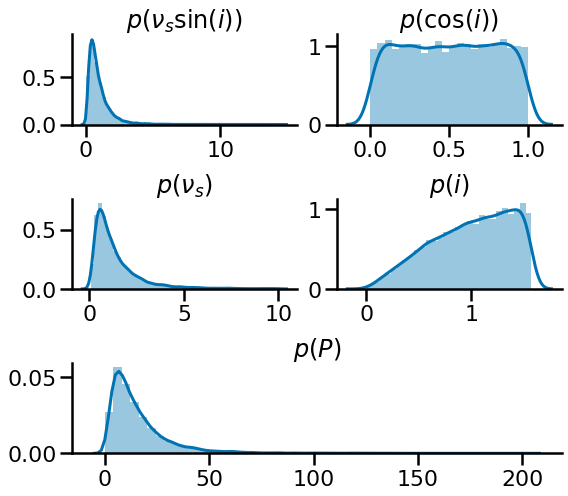

In [4]:
fig = plt.figure(figsize=(8,7))

ax = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(ax[0,0])
sns.distplot(xsplit, ax=ax0)
ax0.set_title(r'$p(\nu_s \sin(i))$')

ax1 = fig.add_subplot(ax[0,1])
sns.distplot(cosi, ax=ax1)
ax1.set_title(r'$p(\cos(i))$')

ax2 = fig.add_subplot(ax[1,0])
sns.distplot(split[split < 10], ax=ax2)
ax2.set_title(r'$p(\nu_s)$')

ax3 = fig.add_subplot(ax[1,1])
sns.distplot(i, ax=ax3)
ax3.set_title(r'$p(i)$')

ax4 = fig.add_subplot(ax[2,:])
sns.distplot(P, ax=ax4)
ax4.set_title(r'$p(P)$')

sns.despine()
fig.tight_layout()

plt.show()

## Let's check the location these priors take up in our data

In [11]:
ati = pd.read_csv('../../data/atium.csv',index_col=0)
ati = ati[ati.eye_flag != 3]
ati = ati[np.isfinite(ati.nus.values)]
ati = ati.sort_values('age')
print(f'We have {len(ati)} stars with results right now.')

We have 94 stars with results right now.


## Period

In [12]:
ati.columns

Index(['KIC', 'Teff', 'age', 'dnu', 'eTeff', 'ednu', 'efeh', 'enumax', 'feh',
       'loage', 'lomodlogg', 'lomodmass', 'lomodrad', 'modlogg', 'modmass',
       'modrad', 'numax', 'source', 'upage', 'upmodlogg', 'upmodmass',
       'upmodrad', 'G', 'bprp', 'hrclass', 'nus*', 'l_nus*', 'u_nus*', 'cosi',
       'l_cosi', 'u_cosi', 'i', 'l_i', 'u_i', 'nus', 'l_nus', 'u_nus', 'P',
       'l_P', 'u_P', 'vsini', 'l_vsini', 'u_vsini', 'fit_numax', 'efit_numax',
       'fit_d01', 'efit_d01', 'fit_d02', 'efit_d02', 'fit_epsilon',
       'efit_epsilon', 'V1', 'eV1', 'V2', 'eV2', 'rhat_flag', 'eye_flag',
       'neff_xsplit', 'neff_cosi', 'neff_split', 'neff_i', 'ebprp'],
      dtype='object')

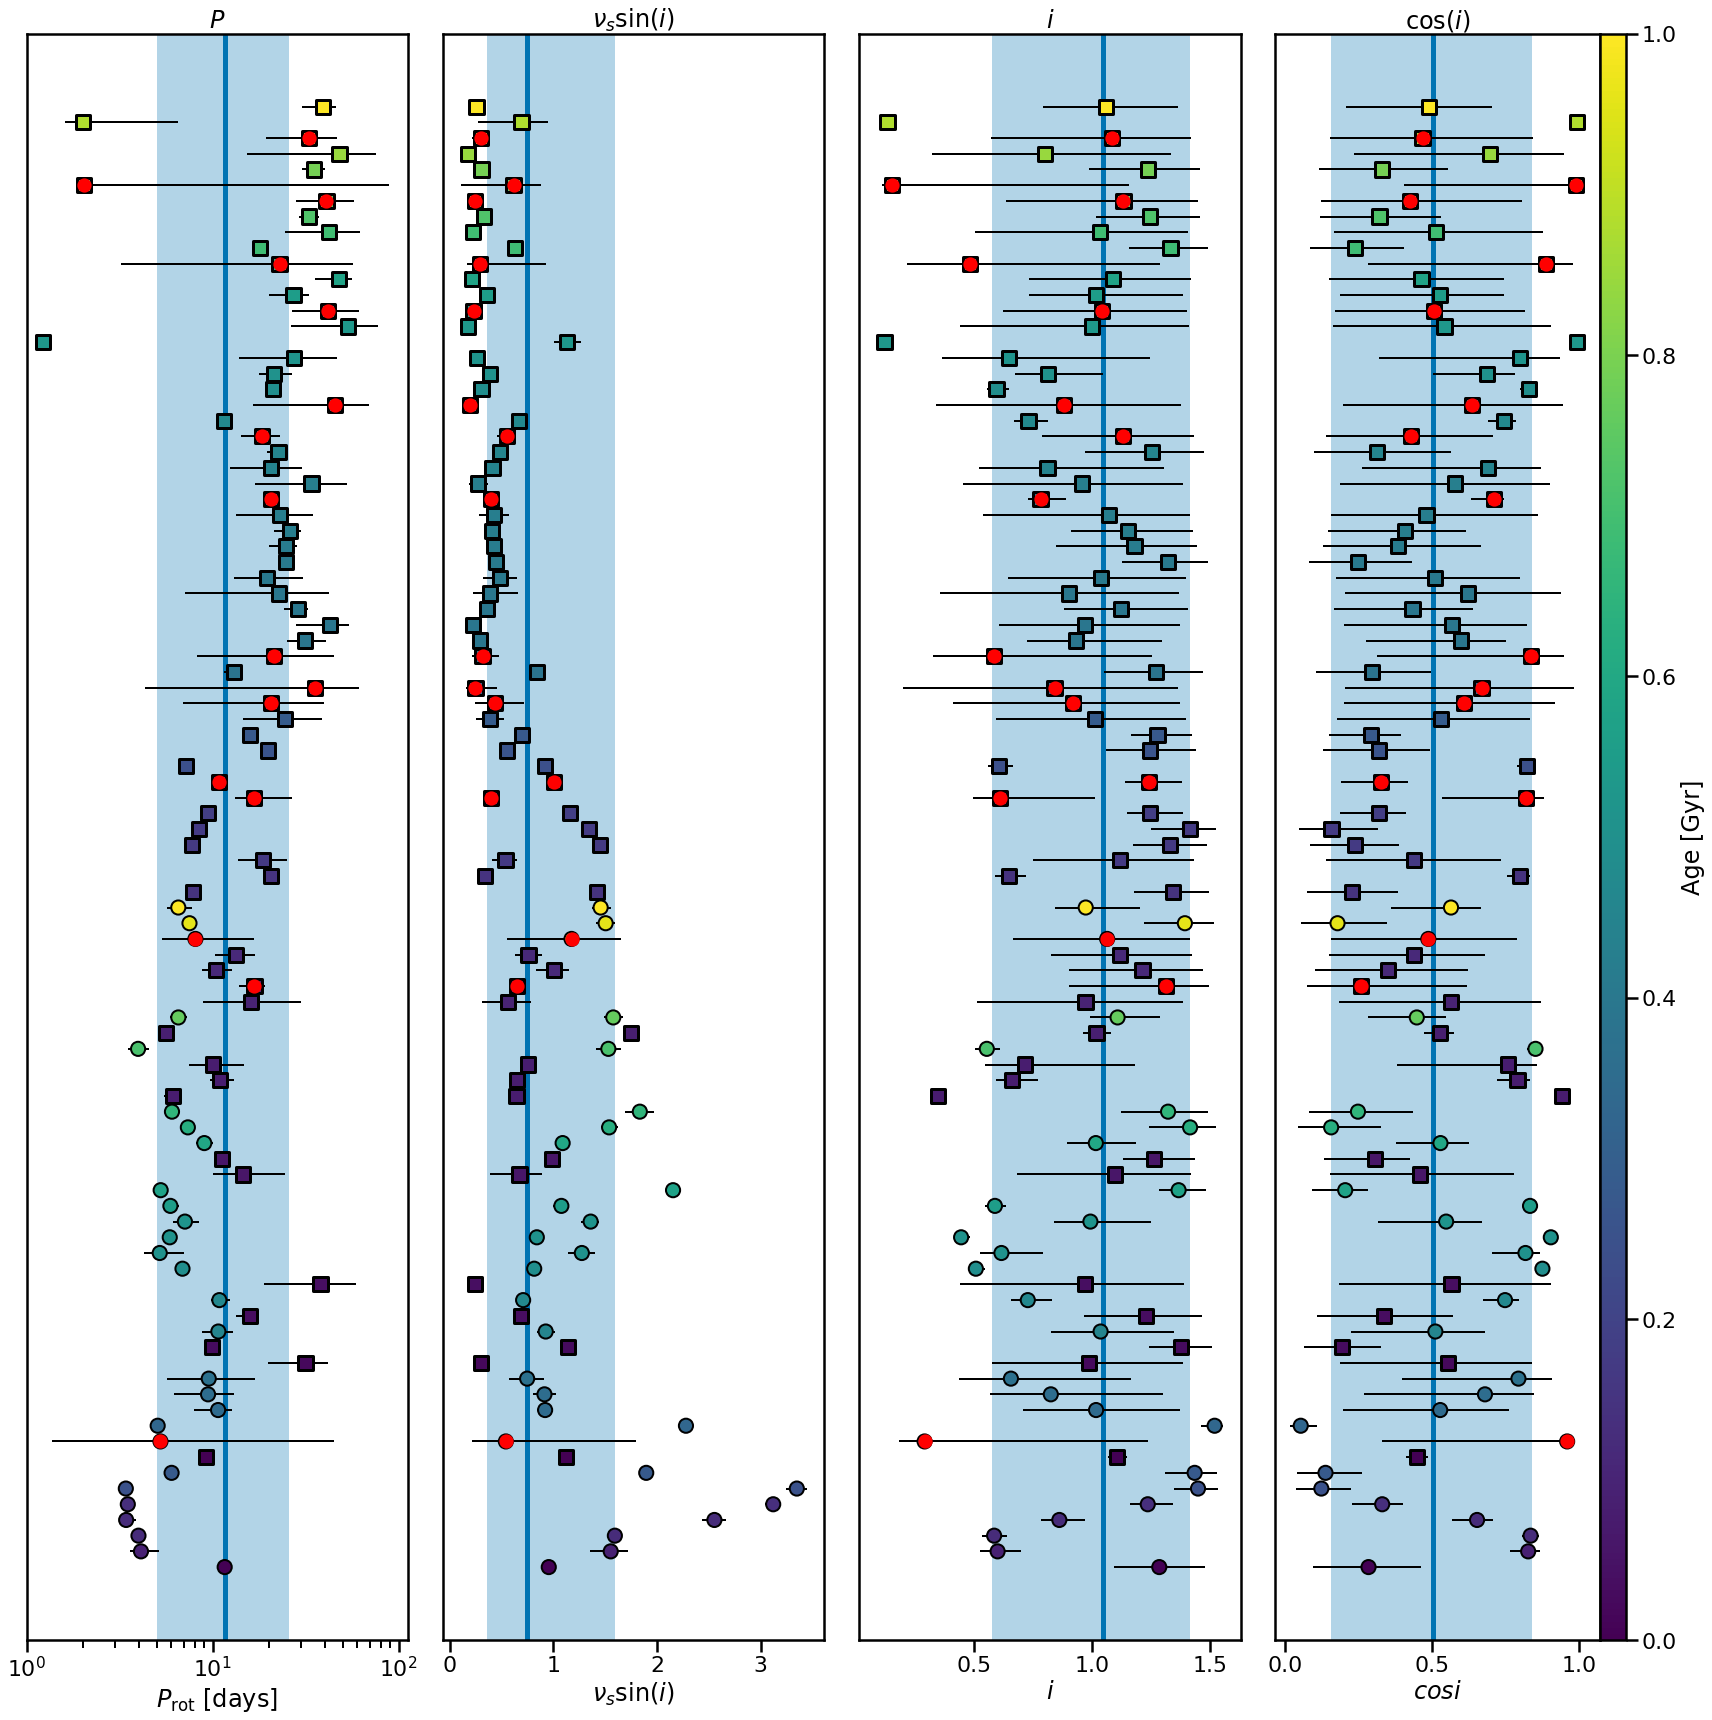

In [14]:
size = 200
ms = ati.hrclass == 'MS'
flag = ati.eye_flag > 0

#Period
l, m, u = np.percentile(P, [16., 50., 84])

fig, axes = plt.subplots(1,4, figsize=(24,24))
ax = axes[0]
y = np.linspace(0, 1, len(ati))
c = ax.scatter(ati.P[~ms], y[~ms], c=ati.age[~ms], s=size, ec='k', lw=2, zorder=3)
c = ax.scatter(ati.P[ms], y[ms], c=ati.age[ms], s=size, ec='k', lw=3, marker=',', zorder=3)
c = ax.scatter(ati.P[flag], y[flag], s=size-50, c='r',  zorder=3)

ax.errorbar(ati.P, y, c='k', lw=2, xerr=[ati.l_P, ati.u_P], yerr=None, fmt='_', zorder=2)

ax.fill_between(np.linspace(l, u), -0.05, 1.05, zorder=0, alpha=.3, label='p(P)')
ax.axvline(m, zorder=1, lw=5)
ax.set_xscale('log')
ax.set_ylim(-0.05, 1.05)
ax.set_xlim(1)
ax.set_xlabel(r'$P_{\rm rot}$ [days]')

#Inclination
l, m, u = np.percentile(i, [16., 50., 84])

ax1 = axes[2]
y = np.linspace(0, 1, len(ati))
c = ax1.scatter(ati.i[~ms], y[~ms], c=ati.age[~ms], s=size, ec='k', lw=2, zorder=3)
c = ax1.scatter(ati.i[ms], y[ms], c=ati.age[ms], s=size, ec='k', lw=3, marker=',', zorder=3)
c = ax1.scatter(ati.i[flag], y[flag], s=size-50, c='r',  zorder=3)

ax1.errorbar(ati.i, y, c='k', lw=2, xerr=[ati.l_i, ati.u_i], yerr=None, fmt='_', zorder=2)

ax1.fill_between(np.linspace(l, u), -0.05, 1.05, zorder=0, alpha=.3, label='p(P)')
ax1.axvline(m, zorder=1, lw=5)

ax1.set_ylim(-0.05, 1.05)
ax1.set_xlabel(r'$i$')

#Projected Splitting
l, m, u = np.percentile(xsplit, [16., 50., 84])

ax2 = axes[1]
y = np.linspace(0, 1, len(ati))
c = ax2.scatter(ati['nus*'][~ms], y[~ms], c=ati.age[~ms], s=size, ec='k', lw=2, zorder=3)
c = ax2.scatter(ati['nus*'][ms], y[ms], c=ati.age[ms], s=size, ec='k', marker=',', lw=3, zorder=3)
c = ax2.scatter(ati['nus*'][flag], y[flag], s=size-50, c='r',  zorder=3)

ax2.errorbar(ati['nus*'], y, c='k', lw=2, xerr=[ati['l_nus*'], ati['u_nus*']], yerr=None, fmt='_', zorder=2)

ax2.fill_between(np.linspace(l, u), -0.05, 1.05, zorder=0, alpha=.3, label='p(P)')
ax2.axvline(m, zorder=1, lw=5)

ax2.set_ylim(-0.05, 1.05)
ax2.set_xlabel(r'$\nu_s \sin(i)$')

#cos(i)
l, m, u = np.percentile(cosi, [16., 50.,84])

ax3 = axes[3]
y = np.linspace(0, 1, len(ati))
c = ax3.scatter(ati.cosi[~ms], y[~ms], c=ati.age[~ms], s=size, ec='k', lw=2, zorder=3)
c = ax3.scatter(ati.cosi[ms], y[ms], c=ati.age[ms], s=size, ec='k', marker=',', lw=3, zorder=3)
c = ax3.scatter(ati.cosi[flag], y[flag], s=size-50, c='r',  zorder=3)
ax3.errorbar(ati.cosi, y, c='k', lw=2, xerr=[ati.l_cosi, ati.u_cosi], yerr=None, fmt='_', zorder=2)

ax3.fill_between(np.linspace(l, u), -0.05, 1.05, zorder=0, alpha=.3, label='p(P)')
ax3.axvline(m, zorder=1, lw=5)

ax3.set_ylim(-0.05, 1.05)
ax3.set_xlabel(r'$cosi$')

ax.set_title(r'$P$')
ax2.set_title(r'$\nu_s \sin(i)$')
ax1.set_title(r'$i$')
ax3.set_title(r'$\cos(i)$')
for a in axes:
    a.get_yaxis().set_visible(False)

fig.colorbar(c,label=r'Age [Gyr]', pad=0,aspect=60, ax=ax3)
fig.tight_layout()

It seems like $i$ is poorly constrained, which is expected. $\nu_s \sin(i)$ is the most tightly constrained, also as expected, and $P$ is for the most part well constrained after being subjected to the inclination angle probability function.

**Question**: Should we be concerned when we sample the priors in $i$, but not in $P$? How does this bias our results on $P$?